In this notebook i handled invertebrate classification dataset and used linear regression as a model.

## Importing Liabraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_dataset.csv')


In [ ]:
data.head()

,SWI,SWF,temperature,size,management,duration
0,0.59,1.30,3.5,0.5,2,20
1,1.21,1.85,4.6,47.2,3,19
2,1.08,0.97,4.8,53.3,4,22
3,1.60,1.67,5.2,27.2,8,20
4,2.95,2.41,5.7,38.8,6,22


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SWI          280 non-null    float64
 1   SWF          280 non-null    float64
 2   temperature  280 non-null    float64
 3   size         280 non-null    float64
 4   management   280 non-null    int64  
 5   duration     280 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 13.2 KB


In [ ]:
data.isnull().sum()

SWI            0
SWF            0
temperature    0
size           0
management     0
duration       0
dtype: int64

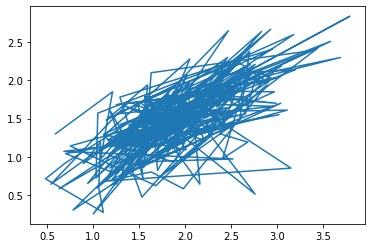

In [ ]:
plt.plot(data.SWI,data.SWF)

## Data splitting

In [ ]:
x=data.drop(['SWI'],axis=1)
y=data.SWI

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

## Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.round(y_pred,2)

## Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
x_pred = model.predict(x_train)
x_pred=np.round(x_pred,2)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['Predicted'] =x_pred[0:10]
output['Difference'] = output['Predicted'] - output['SWI']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = y_pred[0:10]
output['Difference'] = output['Predicted'] - output['SWI']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

      SWI  Predicted  Difference
59   1.74       1.66       -0.08
169  3.04       2.21       -0.83
255  1.98       1.51       -0.47
187  1.81       1.73       -0.08
223  2.10       1.90       -0.20
180  2.08       2.08        0.00
155  1.52       2.00        0.48
105  1.50       1.69        0.19
20   2.00       1.93       -0.07
38   1.47       1.81        0.34 

Model training performance:
---------------------------
RMSE is 0.37680280936168337
R2 score is 0.6239055153520321


      SWI  Predicted  Difference
157  1.68       1.69        0.01
207  1.94       1.93       -0.01
224  2.16       1.34       -0.82
114  3.20       2.47       -0.73
47   1.29       1.43        0.14
43   1.56       1.71        0.15
25   1.61       1.23       -0.38
246  1.91       1.68       -0.23
26   2.47       2.36       -0.11
193  0.78       0.85        0.07 

Model testing performance:
--------------------------
RMSE is 0.37680280936168337
R2 score is 0.6239055153520321


## Processing test dataset

In [ ]:
test= pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_new_test_data.csv')


In [ ]:
Y_pred=model.predict(test)
np.round(Y_pred,2)

array([1.66, 2.01, 2.42, 2.71, 1.79, 3.2 , 2.43, 2.33, 1.99, 2.  , 2.48,
       2.23, 1.92, 2.99, 1.76, 2.11, 2.41, 1.95, 1.96, 2.03, 2.83, 1.79,
       2.6 , 2.32, 2.91, 2.4 , 1.79, 2.05, 3.13, 1.67, 2.33, 2.08, 2.94,
       2.82, 1.83, 2.89, 2.91, 2.48, 1.79, 1.84, 1.61, 2.63, 2.92, 2.89,
       2.26, 2.79, 1.73, 2.14, 2.76, 3.06, 1.82, 2.79, 2.76, 2.55, 2.29,
       1.84, 2.4 , 1.42, 1.96, 2.68, 2.63, 2.75, 2.11, 2.64, 2.22, 2.31,
       2.35, 1.54, 1.92, 2.96, 3.56, 1.21, 2.7 , 2.4 , 3.12, 2.13, 1.63,
       3.  , 2.68, 1.82, 2.52, 2.13, 2.62, 3.43, 2.93, 3.04, 2.99, 2.93,
       2.12, 3.2 , 2.34, 2.35, 2.33, 3.09, 1.93, 2.63, 1.98, 2.16, 2.36,
       2.78, 2.35, 1.58, 1.82, 2.8 , 3.4 , 2.27, 2.07, 2.03, 1.88, 2.24,
       2.45, 3.29, 2.25, 1.52, 2.34, 2.14, 2.37, 2.1 , 2.92, 2.84])

In [ ]:
res = pd.DataFrame(Y_pred)
res.index = test.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>